# Model Building and Training

In this notebook, we build, train, and evaluate classification models to detect fraudulent transactions using the preprocessed and balanced dataset.

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from modeling import split_data, train_baseline, train_ensemble, evaluate_model, perform_cross_validation

## 1. Data Preparation

We load the balanced dataset and split it into training and testing sets using stratification.

In [2]:
df = pd.read_csv('../data/processed/balanced_fraud_data.csv')

# Check for non-numeric columns that might have slipped through
print("Shape before split:", df.shape)
X_train, X_test, y_train, y_test = split_data(df, target_col='class')
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("\nClass distribution in Training set:")
print(y_train.value_counts(normalize=True))

Shape before split: (273922, 10)
Training set shape: (219137, 9)
Testing set shape: (54785, 9)

Class distribution in Training set:
class
1    0.500002
0    0.499998
Name: proportion, dtype: float64


## 2. Baseline Model: Logistic Regression

Logistic Regression provides an interpretable starting point.

Baseline (Logistic Regression) Metrics:
AUC-PR: 0.4951
F1 Score: 0.4576

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.59      0.54     27393
           1       0.51      0.42      0.46     27392

    accuracy                           0.51     54785
   macro avg       0.51      0.51      0.50     54785
weighted avg       0.51      0.51      0.50     54785



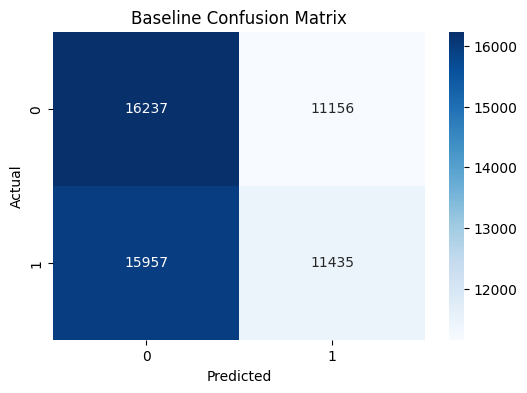

In [3]:
lr_model = train_baseline(X_train, y_train)
lr_metrics = evaluate_model(lr_model, X_test, y_test)

print("Baseline (Logistic Regression) Metrics:")
print(f"AUC-PR: {lr_metrics['auc_pr']:.4f}")
print(f"F1 Score: {lr_metrics['f1']:.4f}")
print("\nClassification Report:")
print(lr_metrics['classification_report'])

# Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(lr_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3. Ensemble Model: Random Forest

Random Forest handles non-linear relationships better.

In [4]:
rf_model = train_ensemble(X_train, y_train, model_type='rf', n_estimators=100, max_depth=10)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

print("Ensemble (Random Forest) Metrics:")
print(f"AUC-PR: {rf_metrics['auc_pr']:.4f}")
print(f"F1 Score: {rf_metrics['f1']:.4f}")
print("\nClassification Report:")
print(rf_metrics['classification_report'])

Ensemble (Random Forest) Metrics:
AUC-PR: 0.9695
F1 Score: 0.9031

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91     27393
           1       0.96      0.85      0.90     27392

    accuracy                           0.91     54785
   macro avg       0.91      0.91      0.91     54785
weighted avg       0.91      0.91      0.91     54785



## 4. Cross-Validation

Ensuring model reliability using 5-fold stratification.

In [5]:
print("Running Cross-Validation for Random Forest...")
cv_results = perform_cross_validation(rf_model, X_train, y_train, cv=5)
print(f"CV F1 Mean: {cv_results['f1_mean']:.4f}")
print(f"CV F1 Std: {cv_results['f1_std']:.4f}")

Running Cross-Validation for Random Forest...
CV F1 Mean: 0.9013
CV F1 Std: 0.0018
